<a href="https://colab.research.google.com/github/LonzoBonzo/AI-Machine-Learning-Web-Development-/blob/main/Milestone1_Group1_Dataset_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Deploy DL Model on Web & Mobile Using TensorFlow
---
## Milestone 1: Build an image classifier
---



In [2]:
from datetime import date
from datetime import datetime

current_date = date.today()
print("Today's date:", current_date)

Today's date: 2025-10-06


In [3]:
now1 = datetime.now()

start_time = now1.strftime("%H:%M:%S")
print("Start Time =", start_time)

Start Time = 18:00:27


In [4]:
# run this once (each session) if `watermark` library is not loaded, then comment out
# If you see errors for the library albumentations and datascience, it can be ignored. These libraries are not used for this project.
!pip install watermark tensorflow==2.20.0.* -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.


In [5]:
# import libraries
import requests
import glob
from io import BytesIO
import numpy as np
import os
import shutil
import pprint
import json
from pprint import pprint


In [6]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
import tensorflow as tf
import pathlib
import tensorflow_hub as hub

In [8]:
import watermark
%load_ext watermark
#%reload_ext watermark

In [9]:
# see version of system, python and libraries
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.12.11
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.6.97+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

Git hash: 

json          : 2.0.9
PIL           : 11.3.0
IPython       : 7.34.0
numpy         : 2.0.2
requests      : 2.32.4
watermark     : 2.5.0
tensorflow_hub: 0.16.1
tensorflow    : 2.20.0
matplotlib    : 3.10.0



In [10]:
tf.__version__


'2.20.0'

# Running GPU on Colab
Ensure that GPU is running on this Colab notebook by following below steps.
1. Colab Menu: Select "Runtime"
2. "Change runtime type"
3. Select "Hardware Accelerator" = GPU
4. Save

In [11]:
# confirm that GPU is running
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
tf.test.gpu_device_name()

'/device:GPU:0'

# Setup Project Folder

In [13]:
!pwd

/content


In [14]:
!ls -lF

total 4
drwxr-xr-x 1 root root 4096 Oct  3 13:36 sample_data/


In [15]:
PROJECT_NAME = "project_food_dl"

In [16]:
# create a sub-directory for the data
# run this once and comment out
# out ~Alonzo
!mkdir -p {PROJECT_NAME}

In [17]:
!ls -lF

total 8
drwxr-xr-x 2 root root 4096 Oct  6 18:01 project_food_dl/
drwxr-xr-x 1 root root 4096 Oct  3 13:36 sample_data/


In [18]:
!ls -lF {PROJECT_NAME}

total 0


In [19]:
# remove log files from models
!rm -rf {PROJECT_NAME}/artifacts


In [20]:
!rm -rf {PROJECT_NAME}/data/food-101.tar.gz

In [21]:
!rm -f artifacts.zip

In [22]:
# create a sub-directory for data
!mkdir -p {PROJECT_NAME}/data

In [23]:
!ls {PROJECT_NAME} -lF

total 4
drwxr-xr-x 2 root root 4096 Oct  6 18:01 data/


Artifacts is common ML term used to describe the output created by the training process.

The output could be a fully trained model, a model checkpoint (for resuming training later), or simply a file created during the training process such as an image generated while training a Generative Adversarial Network (GAN).  
In the case of a Deep Learning model, the model artifacts are the trained weights stored in a binary format.


In [24]:
# create a sub-directory for artifacts
!mkdir -p {PROJECT_NAME}/artifacts

In [25]:
!ls {PROJECT_NAME} -lF

total 8
drwxr-xr-x 2 root root 4096 Oct  6 18:01 artifacts/
drwxr-xr-x 2 root root 4096 Oct  6 18:01 data/


# Get Data

In [26]:
! wget https://lp-prod-resources.s3-us-west-2.amazonaws.com/other/Deploying+a+Deep+Learning+Model+on+Web+and+Mobile+Applications+Using+TensorFlow/Food+101+-+Data+Subset.zip -P {PROJECT_NAME}/data


--2025-10-06 18:01:45--  https://lp-prod-resources.s3-us-west-2.amazonaws.com/other/Deploying+a+Deep+Learning+Model+on+Web+and+Mobile+Applications+Using+TensorFlow/Food+101+-+Data+Subset.zip
Resolving lp-prod-resources.s3-us-west-2.amazonaws.com (lp-prod-resources.s3-us-west-2.amazonaws.com)... 52.92.153.178, 52.92.186.226, 3.5.78.174, ...
Connecting to lp-prod-resources.s3-us-west-2.amazonaws.com (lp-prod-resources.s3-us-west-2.amazonaws.com)|52.92.153.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153668842 (147M) [application/zip]
Saving to: ‘project_food_dl/data/Food+101+-+Data+Subset.zip’

Food+101+-+Data+Sub 100%[===================>] 146.55M  11.0MB/s    in 14s     

2025-10-06 18:02:00 (10.1 MB/s) - ‘project_food_dl/data/Food+101+-+Data+Subset.zip’ saved [153668842/153668842]



In [27]:
# unpack the data
# run only once, then comment out
#out

!unzip -q {PROJECT_NAME}/data/Food+101+-+Data+Subset.zip -d {PROJECT_NAME}/data


In [28]:
!ls {PROJECT_NAME} -lF

total 8
drwxr-xr-x 2 root root 4096 Oct  6 18:01 artifacts/
drwxr-xr-x 4 root root 4096 Oct  6 18:02 data/


In [29]:
DATA_DIR = str(PROJECT_NAME)+"/data/food-101-subset/images"
DATA_DIR = pathlib.Path(DATA_DIR)

In [30]:
!rm -rf {DATA_DIR}/.DS_Store

In [31]:
DATA_DIR


PosixPath('project_food_dl/data/food-101-subset/images')

# Look at dataset

In [32]:
# look at folder names
!ls -lah {DATA_DIR}/ | head

total 128K
drwxr-xr-x 5 root root 4.0K Oct  6 18:02 .
drwxr-xr-x 3 root root 4.0K Dec  5  2020 ..
drwxr-xr-x 2 root root  36K Dec  5  2020 apple_pie
drwxr-xr-x 2 root root  36K Dec  5  2020 caesar_salad
drwxr-xr-x 2 root root  36K Dec  5  2020 falafel


In [33]:
# look at first five images in first image folder
!ls {DATA_DIR}/apple_pie | head -5

1005649.jpg
1011328.jpg
101251.jpg
1014775.jpg
1026328.jpg


In [34]:
# find out how many total images there are in database
# About 3000 ~Alonzo
image_count = len(list(DATA_DIR.glob('*/*.jpg')))
image_count

3000

In [35]:
# find out how many different classes there are
ALL_CLASS_NAMES = sorted(np.array([item.name for item in DATA_DIR.glob('*')]))
print(len(ALL_CLASS_NAMES))

3


In [36]:
ALL_CLASS_NAMES[:10]

[np.str_('apple_pie'), np.str_('caesar_salad'), np.str_('falafel')]

In [37]:
 USE_CLASS_NAMES = ALL_CLASS_NAMES

# Look at Images

In [38]:
class1 = ALL_CLASS_NAMES[0]

Image Size (w, h):  512 , 512
project_food_dl/data/food-101-subset/images/apple_pie/2851371.jpg


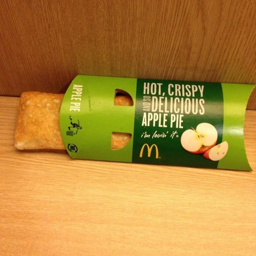

Image Size (w, h):  512 , 341
project_food_dl/data/food-101-subset/images/apple_pie/2627767.jpg


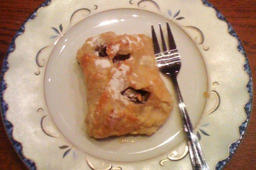

In [39]:
images = list(DATA_DIR.glob(f'{class1}/*'))

for image_path in images[:2]:
    # resize image
    im = Image.open(str(image_path))
    w, h = im.size
    print('Image Size (w, h): ', w, ",",  h)
    print (image_path)
    percent_resize = 0.5
    im = im.resize((int(w*percent_resize), int(h*percent_resize)))
    display.display(im)

# Setup for Training Model


The `ImageDataGenerator` is used to create training and validation splits.
It also has several builtin image preprocessing transformations.

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [40]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

print("Number of classes we are training: " ,len(USE_CLASS_NAMES))
print("\nList of classes")
list(USE_CLASS_NAMES)[:10]

Number of classes we are training:  3

List of classes


[np.str_('apple_pie'), np.str_('caesar_salad'), np.str_('falafel')]

In [41]:
def get_image_data_generator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input ):
  image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2,
    preprocessing_function=preprocessing_function
  )



  # create a data generator object with options (location of images, batch size, option to shuffle, etc)
  image_data_gen = image_generator.flow_from_directory(
      directory=str(DATA_DIR),
      batch_size=BATCH_SIZE,
      shuffle=True,
      target_size=(IMG_HEIGHT, IMG_WIDTH),
      classes = list(USE_CLASS_NAMES)
      )

  return image_data_gen

In [42]:
image_data_gen = get_image_data_generator (preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

Found 3000 images belonging to 3 classes.


# Save list of classes as `classes.json`

In [43]:
image_data_gen.num_classes

3

In [44]:
image_data_gen.class_indices.keys()

dict_keys([np.str_('apple_pie'), np.str_('caesar_salad'), np.str_('falafel')])

In [45]:
list_of_classes = list(image_data_gen.class_indices.keys())

In [46]:
list_of_classes

[np.str_('apple_pie'), np.str_('caesar_salad'), np.str_('falafel')]

In [47]:
with open(f"{PROJECT_NAME}/artifacts/classes.json",'w') as f:
  json.dump(list_of_classes,f)

---

# Model Architectures

### Model 1:  VGG19 (Baseline)

In [48]:
?tf.keras.layers.Dense

In [49]:
IMAGE_SHAPE = (IMG_HEIGHT, IMG_WIDTH)

# Use VGG19 pretrained on ImageNet
base_layers = tf.keras.applications.VGG19(weights='imagenet',include_top=False,input_shape=IMAGE_SHAPE+(3,) )

# Add new layers to be finetuned
# The last layer, is the classification layer and should match the number of classes in the dataset. The activation should be softmax
clf = tf.keras.Sequential([
    base_layers
    , tf.keras.layers.GlobalAveragePooling2D()
    , tf.keras.layers.Dense(1024, activation='relu')
    , tf.keras.layers.Dense(image_data_gen.num_classes , name='classification', activation='softmax')
])

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [50]:
clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification (Dense)          │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,552,771 (78.40 MB)

 Trainable params: 20,552,771 (78.40 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# freezes the base layers
base_layers.trainable = False

In [52]:
# notice that after freezing the base layers, the non trainable params are equal to the number of parameters in the base layer
clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification (Dense)          │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,552,771 (78.40 MB)

 Trainable params: 528,387 (2.02 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [53]:
# Set the model to use Adam optimizer , cross entropy loss, and track accuracy.
# Since the dataset has multiple classes, we are using cross entropy loss.
clf.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy' ,
  metrics=['acc'])

#### Model results

In [54]:
# train the model for 5 epochs
%%time
image_data_gen = get_image_data_generator (preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
history = clf.fit(image_data_gen
                        ,epochs=5
                        )


Found 3000 images belonging to 3 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 40s 285ms/step - acc: 0.7388 - loss: 2.4634
Epoch 2/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 187ms/step - acc: 0.9461 - loss: 0.1914
Epoch 3/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 187ms/step - acc: 0.9639 - loss: 0.1227
Epoch 4/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 189ms/step - acc: 0.9762 - loss: 0.0832
Epoch 5/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 191ms/step - acc: 0.9775 - loss: 0.0583
CPU times: user 1min 27s, sys: 4.97 s, total: 1min 32s
Wall time: 1min 51s


#### Save model

In [55]:
# save the model as `h5` format
export_path = str(PROJECT_NAME)+"/artifacts/model_VGG19.h5"
export_path
clf.save(export_path, save_format='h5')


### Model 2:  ResNet50
On your own, train a model using ResNet50.

In [56]:
base_layers = tf.keras.applications.ResNet50(weights='imagenet',include_top=False,input_shape=IMAGE_SHAPE+(3,) )

# Add new layers to be finetuned
# The last layer, is the classification layer and should match the number of classes in the dataset. The activation should be softmax
clf = tf.keras.Sequential([
    base_layers
    , tf.keras.layers.GlobalAveragePooling2D()
    , tf.keras.layers.Dense(1024, activation='relu')
    , tf.keras.layers.Dense(image_data_gen.num_classes , name='classification', activation='softmax')
])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [57]:
clf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification (Dense)          │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,688,963 (98.00 MB)

 Trainable params: 25,635,843 (97.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [58]:
# freezes the base layers
base_layers.trainable = False

In [59]:
# notice that after freezing the base layers, the non trainable params are equal to the number of parameters in the base layer
clf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification (Dense)          │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,688,963 (98.00 MB)

 Trainable params: 2,101,251 (8.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [60]:
# Set the model to use Adam optimizer , cross entropy loss, and track accuracy.
# Since the dataset has multiple classes, we are using cross entropy loss.
clf.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy' ,
  metrics=['acc'])

In [61]:
# train the model for 5 epochs
%%time
image_data_gen = get_image_data_generator (preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

history = clf.fit(image_data_gen
                        ,epochs=5
                        )

Found 3000 images belonging to 3 classes.
Epoch 1/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 34s 171ms/step - acc: 0.7651 - loss: 1.1183
Epoch 2/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 27s 109ms/step - acc: 0.9394 - loss: 0.1598
Epoch 3/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - acc: 0.9648 - loss: 0.0955
Epoch 4/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - acc: 0.9821 - loss: 0.0634
Epoch 5/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - acc: 0.9924 - loss: 0.0275
CPU times: user 1min 18s, sys: 2.86 s, total: 1min 21s
Wall time: 1min 33s


In [62]:
# save the model as `h5` format
export_path = str(PROJECT_NAME)+"/artifacts/model_ResNet50.h5"
export_path
clf.save(export_path, save_format='h5')

### Model 3: MobileNetV2 (Final)
On your own, train a model using MobileNetV2.

In [63]:
base_layers = tf.keras.applications.MobileNetV2(weights='imagenet',include_top=False,input_shape=IMAGE_SHAPE+(3,) )

# Add new layers to be finetuned
# The last layer, is the classification layer and should match the number of classes in the dataset. The activation should be softmax
clf = tf.keras.Sequential([
    base_layers
    , tf.keras.layers.GlobalAveragePooling2D()
    , tf.keras.layers.Dense(1024, activation='relu')
    , tf.keras.layers.Dense(image_data_gen.num_classes , name='classification', activation='softmax')
])




9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [64]:
clf.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification (Dense)          │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,572,803 (13.63 MB)

 Trainable params: 3,538,691 (13.50 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [65]:
# freezes the base layers
base_layers.trainable = False

In [66]:
clf.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification (Dense)          │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,572,803 (13.63 MB)

 Trainable params: 1,314,819 (5.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [67]:
clf.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy' ,
  metrics=['acc'])

In [68]:
# train the model for 5 epochs
%%time
image_data_gen = get_image_data_generator (
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

history = clf.fit(image_data_gen
                        ,epochs=5
                        )

Found 3000 images belonging to 3 classes.
Epoch 1/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 36s 209ms/step - acc: 0.8045 - loss: 0.4979
Epoch 2/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - acc: 0.9514 - loss: 0.1278
Epoch 3/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - acc: 0.9620 - loss: 0.0994
Epoch 4/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - acc: 0.9880 - loss: 0.0450
Epoch 5/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - acc: 0.9914 - loss: 0.0257
CPU times: user 1min 13s, sys: 2.81 s, total: 1min 15s
Wall time: 1min 8s


In [69]:
# save the model as `h5` format
export_path = str(PROJECT_NAME)+"/artifacts/model_MobileNet.h5"
export_path
clf.save(export_path, save_format='h5')

## Fine tune model (OPTIONAL)

The model accuracy can be further improved by
- unfreezing the early layers, use [transfer learning](https://www.tensorflow.org/guide/keras/transfer_learning)
- use [data augmentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

# Time to Train

In [70]:
now2 = datetime.now()

end_time = now2.strftime("%H:%M:%S")
print("End Time =", end_time)

End Time = 18:06:56


In [71]:
diff2=((now2-now1).total_seconds() )/ (60)
print("Time to run (minutes): ", diff2)

Time to run (minutes):  6.486492433333334


# Get Model Size

In [72]:
! du -h {PROJECT_NAME}/artifacts

221M	project_food_dl/artifacts


In [73]:
!ls {PROJECT_NAME}/artifacts/ -lah

total 221M
drwxr-xr-x 2 root root 4.0K Oct  6 18:06 .
drwxr-xr-x 4 root root 4.0K Oct  6 18:01 ..
-rw-r--r-- 1 root root   40 Oct  6 18:02 classes.json
-rw-r--r-- 1 root root  25M Oct  6 18:06 model_MobileNet.h5
-rw-r--r-- 1 root root 115M Oct  6 18:05 model_ResNet50.h5
-rw-r--r-- 1 root root  83M Oct  6 18:04 model_VGG19.h5


# Compare Models

- Dataset:  Food
- Classes: 3
- Total images: 3000
- Batch size: 32

| Model  | Trainable Params| Non-trainable Params | Time (hh:mm:ss) [a]| Accuracy | Epochs | Model Size [b]
|---|---:|---:|---:|---:| ---:|---:|
| VGG19| 528,387   | 20,024,384 | 00:01:31 | 98.3% | 5 | 83M
| ResNet50   | 2,101,251   | 23,587,712 |  00:01:12 | 98.8% | 5 | 115M
| MobileNetV2  | 1,314,819  | 2,257,984 |   00:00:59 | 99.6% | 5 | 24M
| ResNet50_ft [c]  | xxx  | xxx | xx:xx:xx   | xx.x% | xx | xxM



NOTES:  
- [a] If wall clock time < CPU time, then you're executing a program in parallel.
- [b] model size is size of output file
- [c] ft = fine-tuned


# Model Prediction

In [74]:
model_path = str(PROJECT_NAME)+"/artifacts/model_MobileNet.h5"
clf_final = tf.keras.models.load_model(model_path)

In [75]:
with open(f"{PROJECT_NAME}/artifacts/classes.json",'r') as f:
  list_of_classes = json.load(f)
  #content = f.read()

In [76]:
list_of_classes

['apple_pie', 'caesar_salad', 'falafel']

In [77]:
# if you want to delete a directory from past runs
!rm -rf {PROJECT_NAME}/test_image

In [78]:
# create a sub-directory for data
!mkdir -p {PROJECT_NAME}/test_image

In [79]:
!wget https://natashaskitchen.com/wp-content/uploads/2019/01/Caesar-Salad-Recipe-3.jpg -P {PROJECT_NAME}/test_image -O {PROJECT_NAME}/test_image/caesar_salad.jpg

--2025-10-06 18:06:57--  https://natashaskitchen.com/wp-content/uploads/2019/01/Caesar-Salad-Recipe-3.jpg
Resolving natashaskitchen.com (natashaskitchen.com)... 104.16.151.108, 104.16.150.108, 2606:4700::6810:966c, ...
Connecting to natashaskitchen.com (natashaskitchen.com)|104.16.151.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 173804 (170K) [image/jpeg]
Saving to: ‘project_food_dl/test_image/caesar_salad.jpg’

caesar_salad.jpg    100%[===================>] 169.73K  --.-KB/s    in 0.003s  

2025-10-06 18:06:58 (63.5 MB/s) - ‘project_food_dl/test_image/caesar_salad.jpg’ saved [173804/173804]



In [80]:
!wget https://upload.wikimedia.org/wikipedia/commons/9/99/Black_square.jpg -P {PROJECT_NAME}/test_image -O {PROJECT_NAME}/test_image/black_square.jpg

--2025-10-06 18:06:58--  https://upload.wikimedia.org/wikipedia/commons/9/99/Black_square.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3890 (3.8K) [image/jpeg]
Saving to: ‘project_food_dl/test_image/black_square.jpg’

black_square.jpg    100%[===================>]   3.80K  --.-KB/s    in 0s      

2025-10-06 18:06:58 (1.26 GB/s) - ‘project_food_dl/test_image/black_square.jpg’ saved [3890/3890]



In [81]:
#
!wget https://image.shutterstock.com/image-photo/brown-light-wooden-round-dining-260nw-588358070.jpg -P {PROJECT_NAME}/test_image  -O {PROJECT_NAME}/test_image/table.jpg


--2025-10-06 18:06:58--  https://image.shutterstock.com/image-photo/brown-light-wooden-round-dining-260nw-588358070.jpg
Resolving image.shutterstock.com (image.shutterstock.com)... 13.35.37.77, 13.35.37.40, 13.35.37.80, ...
Connecting to image.shutterstock.com (image.shutterstock.com)|13.35.37.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11954 (12K) [image/jpeg]
Saving to: ‘project_food_dl/test_image/table.jpg’

table.jpg           100%[===================>]  11.67K  --.-KB/s    in 0s      

2025-10-06 18:06:58 (179 MB/s) - ‘project_food_dl/test_image/table.jpg’ saved [11954/11954]



In [82]:
img_path = f"{PROJECT_NAME}/test_image/caesar_salad.jpg"
#img_path = f"{PROJECT_NAME}/test_image/table.jpg"
#img_path = f"{PROJECT_NAME}/test_image/black_square.jpg"

img_path

'project_food_dl/test_image/caesar_salad.jpg'

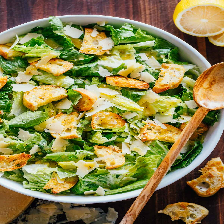

In [83]:
tf.keras.preprocessing.image.load_img(img_path, target_size = (IMG_HEIGHT, IMG_WIDTH))


In [84]:
def load_img_predict(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size = (IMG_HEIGHT, IMG_WIDTH))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.applications.mobilenet_v2.preprocess_input(img)

    img = np.expand_dims(img, axis = 0)

    return img

In [85]:
clf_final.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification (Dense)          │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,572,805 (13.63 MB)

 Trainable params: 1,314,819 (5.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)

In [86]:
def predict_image(img_path,classifier):
    img = load_img_predict(img_path)
    res = clf_final.predict(img)

    res = sorted (
        list(zip (
            list_of_classes
            , np.squeeze(res)
         )
        )
     , key=lambda x: x[1]
     , reverse=True
    )

    return res

In [87]:
predict_image(img_path,clf_final)[:15]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


[('caesar_salad', np.float32(0.9999833)),
 ('falafel', np.float32(1.586473e-05)),
 ('apple_pie', np.float32(8.1170924e-07))]

# Download Assets
download model and classes.json

In [88]:
!zip -r {PROJECT_NAME}/artifacts/artifacts.zip {PROJECT_NAME}/artifacts/

  adding: project_food_dl/artifacts/ (stored 0%)
  adding: project_food_dl/artifacts/model_VGG19.h5 (deflated 7%)
  adding: project_food_dl/artifacts/classes.json (deflated 5%)
  adding: project_food_dl/artifacts/model_ResNet50.h5 (deflated 7%)
  adding: project_food_dl/artifacts/model_MobileNet.h5 (deflated 8%)


In [89]:
from google.colab import files
files.download(str(str(PROJECT_NAME)+"/artifacts/artifacts.zip"))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **This is my part (Alonzo) I didn't know where to implement the code but seeing how it works from anywhere I'll debug the kinks a few days later when we have breathing space**

In [90]:
print("Dataset path: ", DATA_DIR)
print("Classes: ", os.listdir(DATA_DIR))

Dataset path:  project_food_dl/data/food-101-subset/images
Classes:  ['falafel', 'apple_pie', 'caesar_salad']


Found 3000 files belonging to 3 classes.
Classes: ['apple_pie', 'caesar_salad', 'falafel']


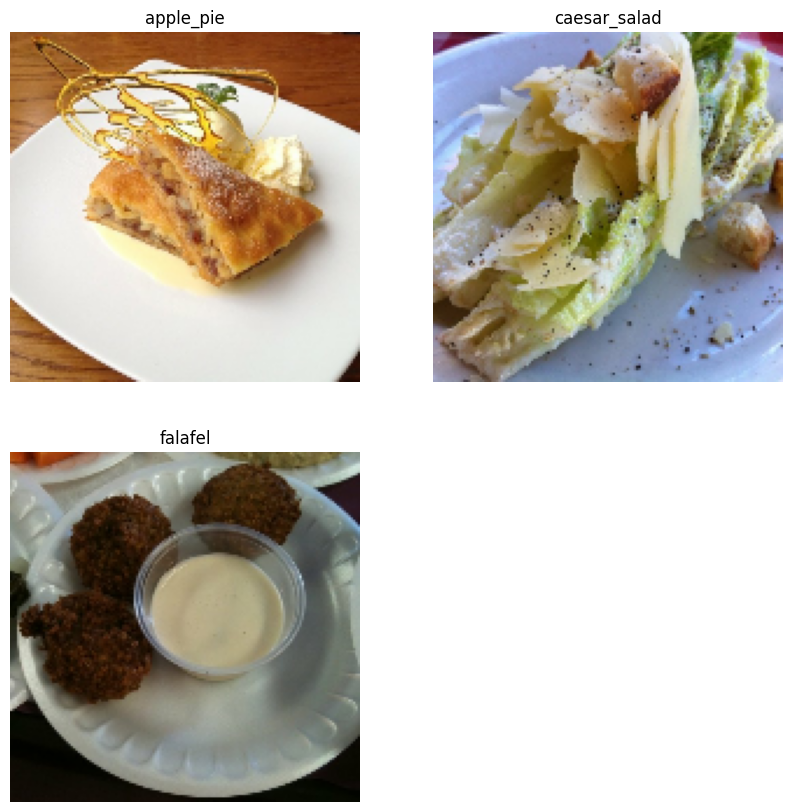

In [91]:
DATA_DIR = str(PROJECT_NAME) + "/data/food-101-subset/images"

train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    image_size=(150, 150),
    batch_size=32,
    shuffle=True
)

class_names = train_ds.class_names
print("Classes:", class_names)

plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(len(class_names)):
        idx = tf.where(labels == i)[0][0].numpy()
        ax = plt.subplot(2, len(class_names)//2 + 1, i + 1)
        plt.imshow(images[idx].numpy().astype("uint8"))
        plt.title(class_names[i])
        plt.axis("off")

plt.show()

In [92]:
DATA_DIR = str(PROJECT_NAME) + "/data/food-101-subset/images"

train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    image_size=(150, 150),
    batch_size=32,
    shuffle=True
)

# Get class names
class_names = train_ds.class_names


class_counts = {name: 0 for name in class_names}
for images, labels in train_ds:
    unique, counts = np.unique(labels.numpy(), return_counts=True)
    for u, c in zip(unique, counts):
        class_counts[class_names[u]] += c


for images, labels in train_ds.take(1):
    img_shape = images[0].shape

# Summary
print("📊 DATASET SUMMARY")
print("-------------------------")
print(f"Total images: {sum(class_counts.values())}")
print(f"Number of classes: {len(class_names)}")
print(f"Image dimensions: {img_shape}")
print("\nImages per class:")
for cls, count in class_counts.items():
    print(f"  • {cls}: {count} images")

Found 3000 files belonging to 3 classes.
📊 DATASET SUMMARY
-------------------------
Total images: 3000
Number of classes: 3
Image dimensions: (150, 150, 3)

Images per class:
  • apple_pie: 1000 images
  • caesar_salad: 1000 images
  • falafel: 1000 images


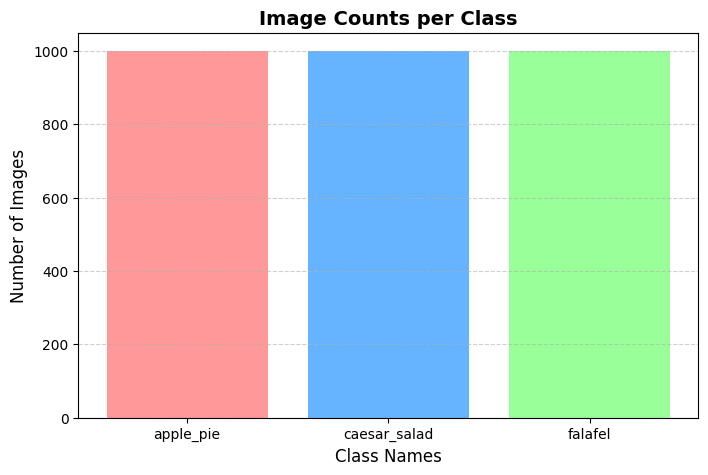

In [93]:


# Class counts (already computed)
class_counts = {
    "apple_pie": 1000,
    "caesar_salad": 1000,
    "falafel": 1000
}

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(class_counts.keys(), class_counts.values(), color=['#ff9999','#66b3ff','#99ff99'])
plt.title("Image Counts per Class", fontsize=14, fontweight='bold')
plt.xlabel("Class Names", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
